array([[1.        , 3.        , 0.09717965, 2.        ],
       [2.        , 4.        , 0.14442429, 3.        ],
       [0.        , 5.        , 0.18601357, 4.        ]])

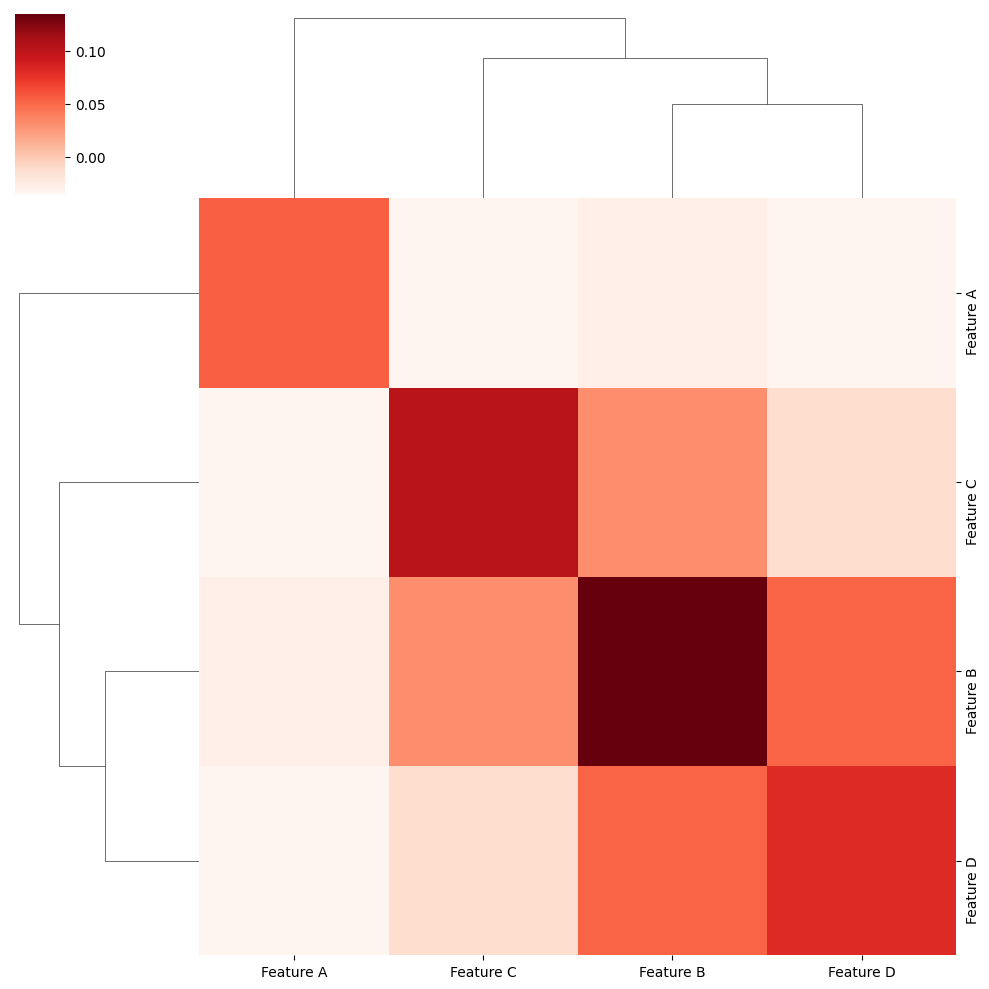

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Generate sample data
np.random.seed(42)
data = pd.DataFrame(
    np.random.rand(10, 4),  # 10 samples, 4 features
    columns=["Feature A", "Feature B", "Feature C", "Feature D"]
)

# Compute correlation and covariance matrices
corr_matrix = data.corr()
cov_matrix = data.cov()

h = sns.clustermap(cov_matrix, cmap='Reds')
Z = h.dendrogram_col.linkage  
Z


array([[ 1.        , -0.33525076, -0.46859001, -0.51464947],
       [-0.33525076,  1.        ,  0.27270313,  0.50600699],
       [-0.46859001,  0.27270313,  1.        , -0.13651269],
       [-0.51464947,  0.50600699, -0.13651269,  1.        ]])

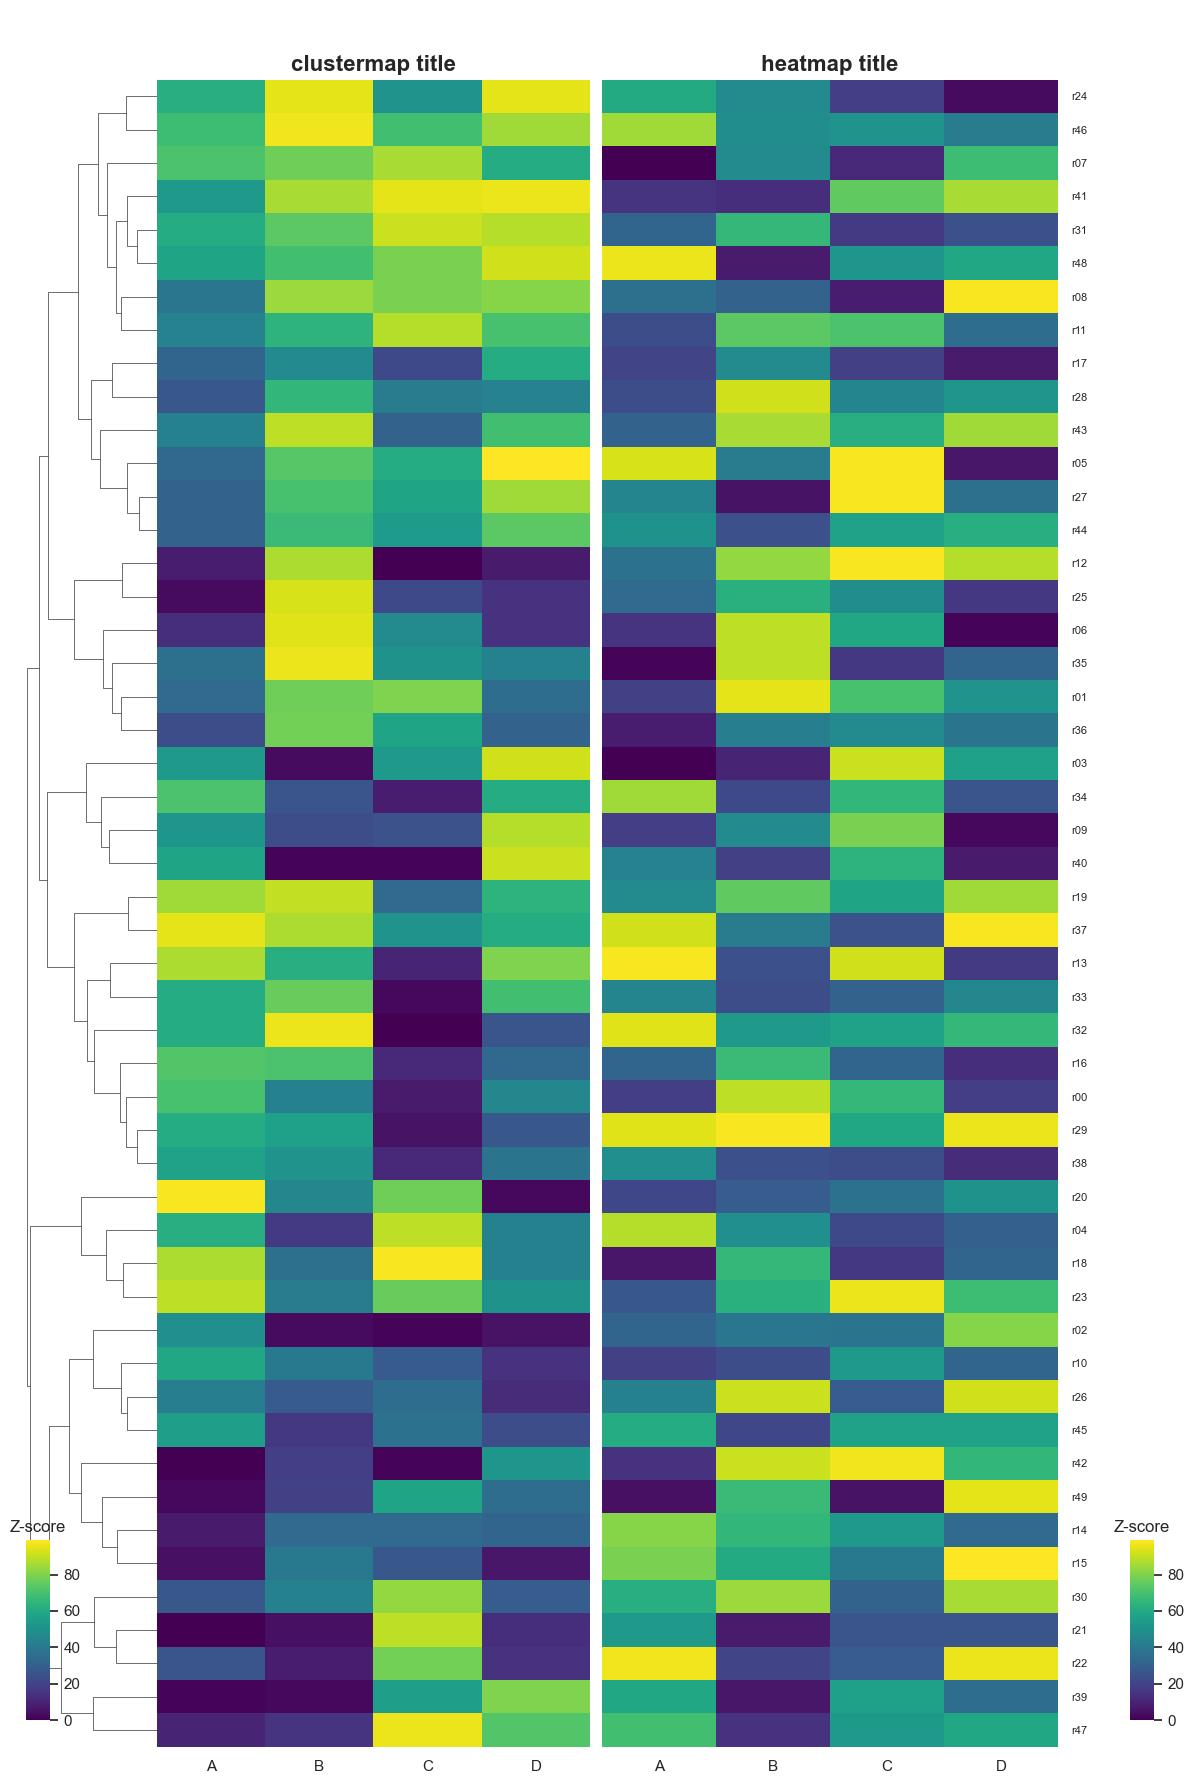

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

index = [f'r{i:02}' for i in range(50)]
df = pd.DataFrame(np.random.randint(0, 100, size=(50, 4)), columns=list('ABCD'), index=index)
df2 = pd.DataFrame(np.random.randint(0, 100, size=(50, 4)), columns=list('ABCD'), index=index)

# clustermap from df1
g = sns.clustermap(df, figsize=(12, 18), col_cluster=False, yticklabels=True, cmap='viridis',
                   dendrogram_ratio=(0.12, 0.04),  # space for the left and top dendograms
                   cbar_pos=[0.02, 0.04, 0.02, 0.1])
g.ax_cbar.set_title('Z-score')
g.ax_heatmap.set_xlabel('')  # remove possible xlabel
g.ax_heatmap.set_title('clustermap title', weight="bold", fontsize=16)  # Set a custom title

# extract the order of the y tick labels of the clustermap (before removing the ticks)
new_index = [t.get_text() for t in g.ax_heatmap.get_yticklabels()]
# remove right ticks and tick labels of the clustermap
g.ax_heatmap.tick_params(axis='y', right=False, labelright=False)
g.ax_heatmap.tick_params(axis='x', labelbottom=True, bottom=False)

# get position of heatmap
heatmap_bbox = g.ax_heatmap.get_position()
# make space for the right heatmap by reducing the size of the clustermap's heatmap
g.ax_heatmap.set_position([heatmap_bbox.x0, heatmap_bbox.y0, 0.49 - heatmap_bbox.x0, heatmap_bbox.height])

ax2 = plt.axes([0.50, heatmap_bbox.y0, 0.38, heatmap_bbox.height])
cbar_2_ax = plt.axes([0.94, 0.04, 0.02, 0.1])

# plot heatmap in the new axes, reordering the rows similar as in the clustermap
sns.heatmap(df2.reindex(new_index), cmap='viridis', cbar=True, yticklabels=True, ax=ax2, cbar_ax=cbar_2_ax)

ax2.tick_params(axis='y', labelsize=8, labelright=True, left=False, labelleft=False, labelrotation=0)
ax2.tick_params(axis='x', labelbottom=True, bottom=False)

ax2.set_title('heatmap title', weight="bold", fontsize=16)  # Set a custom title
cbar_2_ax.set_title('Z-score')

# title = "Clustermap (left) & heatmap (right)"
# plt.suptitle(title, weight="bold", fontsize=20)

plt.show()